In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import os

In [2]:
df = pd.read_csv(r"database_prepared.csv")
df.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude,Timestamp
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0,-157630542.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8,-157465811.0
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2,-157355642.0
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8,-157093817.0
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8,-157026430.0


In [3]:
X = df[['Timestamp', 'Latitude', 'Longitude']]
y = df[['Magnitude', 'Depth']]

In [4]:
def create_sequences(data, sequence_length):
    X = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i + sequence_length]
        X.append(sequence)
    return np.array(X)

SEKWENCJE JEDNOELEMENTOWE

In [5]:
N=1
sequence_length = N  # Set N to the desired number of previous timestamps to consider

# Convert DataFrame to numpy array
X1 = X.values
y1 = y.values

# Reshape X_train and y_train to create sequences
X_s = create_sequences(X1, sequence_length)
y_s = y1[sequence_length:]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=42)

In [7]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU

# Define LSTM model
model = Sequential([
    LSTM(10, input_shape=(1,3)),
    Dense(30,activation='relu'),
    Dense(10,activation='relu'),
    Dense(2,activation='softmax')
    ])

model.compile(optimizer='adam', loss='squared_hinge',metrics=['accuracy'])


In [8]:
h1=model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
513/513 [==============================] - 10s 12ms/step - loss: 0.0039 - accuracy: 0.8138 - val_loss: 0.0037 - val_accuracy: 0.9796
Epoch 2/10
513/513 [==============================] - 4s 8ms/step - loss: 0.0039 - accuracy: 0.9818 - val_loss: 0.0037 - val_accuracy: 0.9796
Epoch 3/10
513/513 [==============================] - 3s 6ms/step - loss: 0.0038 - accuracy: 0.9818 - val_loss: 0.0037 - val_accuracy: 0.9796
Epoch 4/10
513/513 [==============================] - 5s 9ms/step - loss: 0.0038 - accuracy: 0.9818 - val_loss: 0.0037 - val_accuracy: 0.9796
Epoch 5/10
513/513 [==============================] - 5s 10ms/step - loss: 0.0038 - accuracy: 0.9818 - val_loss: 0.0037 - val_accuracy: 0.9796
Epoch 6/10
513/513 [==============================] - 5s 9ms/step - loss: 0.0038 - accuracy: 0.9818 - val_loss: 0.0037 - val_accuracy: 0.9796
Epoch 7/10
513/513 [==============================] - 4s 7ms/step - loss: 0.0038 - accuracy: 0.9818 - val_loss: 0.0037 - val_accuracy: 0.9796
Epo

In [9]:
model2 = Sequential([
    GRU(10, input_shape=(1,3)),
    Dense(30,activation='relu'),
    Dense(30,activation='relu'),
    Dense(10,activation='relu'),
    Dense(2,activation='softmax')
])
model2.compile(optimizer='adam', loss='squared_hinge',metrics=['accuracy'])
h2=model2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
513/513 [==============================] - 10s 11ms/step - loss: 0.0039 - accuracy: 0.9796 - val_loss: 0.0037 - val_accuracy: 0.9796
Epoch 2/10
513/513 [==============================] - 5s 10ms/step - loss: 0.0038 - accuracy: 0.9818 - val_loss: 0.0037 - val_accuracy: 0.9796
Epoch 3/10
513/513 [==============================] - 5s 9ms/step - loss: 0.0038 - accuracy: 0.9818 - val_loss: 0.0037 - val_accuracy: 0.9796
Epoch 4/10
513/513 [==============================] - 5s 9ms/step - loss: 0.0038 - accuracy: 0.9818 - val_loss: 0.0037 - val_accuracy: 0.9796
Epoch 5/10
513/513 [==============================] - 3s 6ms/step - loss: 0.0038 - accuracy: 0.9818 - val_loss: 0.0037 - val_accuracy: 0.9796
Epoch 6/10
513/513 [==============================] - 3s 6ms/step - loss: 0.0038 - accuracy: 0.9818 - val_loss: 0.0037 - val_accuracy: 0.9796
Epoch 7/10
513/513 [==============================] - 3s 6ms/step - loss: 0.0038 - accuracy: 0.9818 - val_loss: 0.0037 - val_accuracy: 0.9796
Epo

In [10]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

def tr_plot(tacc,tloss,vacc,vloss,w,h):
    start_epoch=0
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)  
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    plt.rcParams['axes.facecolor'] = 'white'

    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(w,h))
    axes[0].plot (Epochs,tacc,'b',label= 'Training Accuracy')
    axes[0].scatter(Epochs, tacc, s=70, c='blue')
    axes[0].plot (Epochs,vacc,'r',label= 'Validation Accuracy')
    axes[0].scatter(Epochs, vacc, s=70, c='red')

    #axes[0].set_title('Training and Validation Accuracy')
    axes[0].set_xlabel('Epochs', fontsize=25)
    axes[0].set_ylabel('Accuracy', fontsize=25)
    axes[0].legend(fontsize=25)
    
    

    axes[1].plot (Epochs,tloss,'b',label= 'Training Loss')
    axes[1].scatter(Epochs, tloss, s=70, c='blue')
    axes[1].plot (Epochs,vloss,'r',label= 'Validation Loss')
    axes[1].scatter(Epochs, vloss, s=70, c='red')

    #axes[0].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs', fontsize=25)
    axes[1].set_ylabel('Accuracy', fontsize=25)
    axes[1].legend(fontsize=25)
    fig.patch.set_facecolor('white')

   
    plt.tight_layout    
    plt.show()
    return 


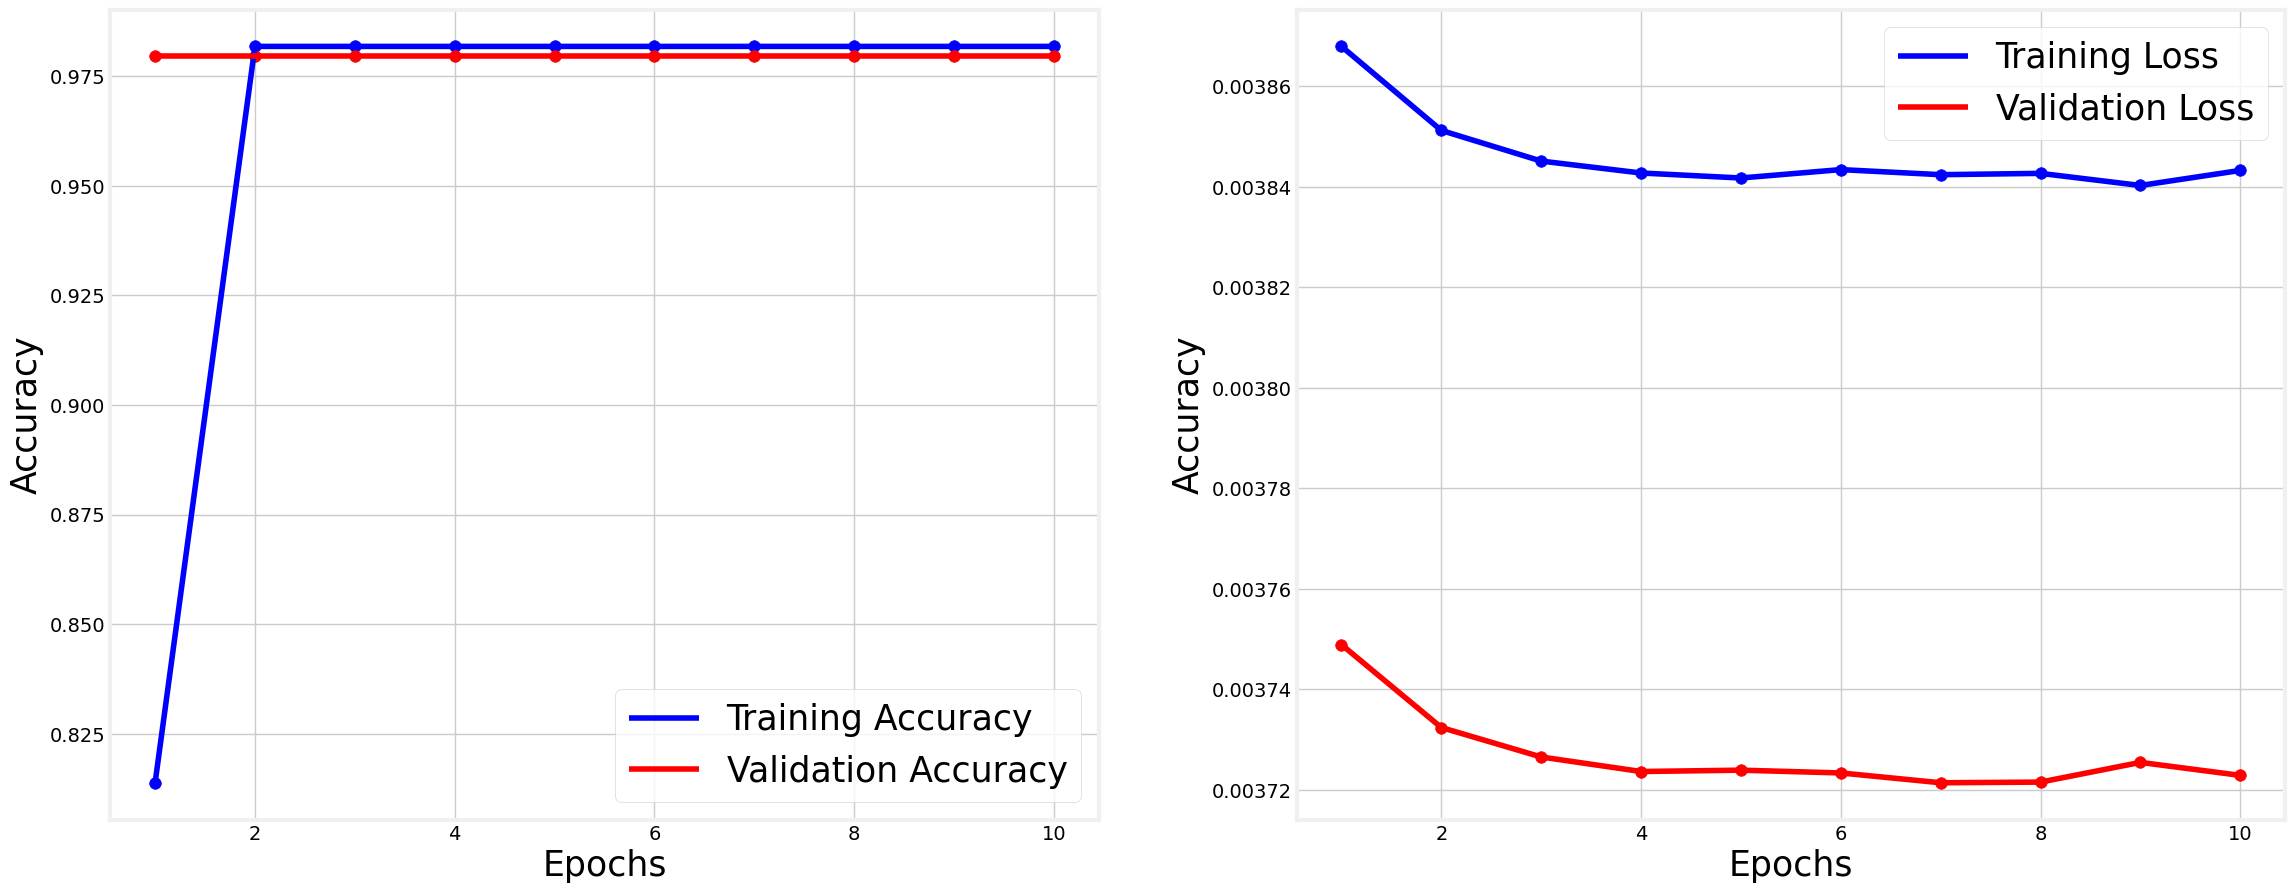

In [11]:
tr_plot(h1.history['accuracy'],h1.history['loss'],h1.history['val_accuracy'],h1.history['val_loss'],25,10)

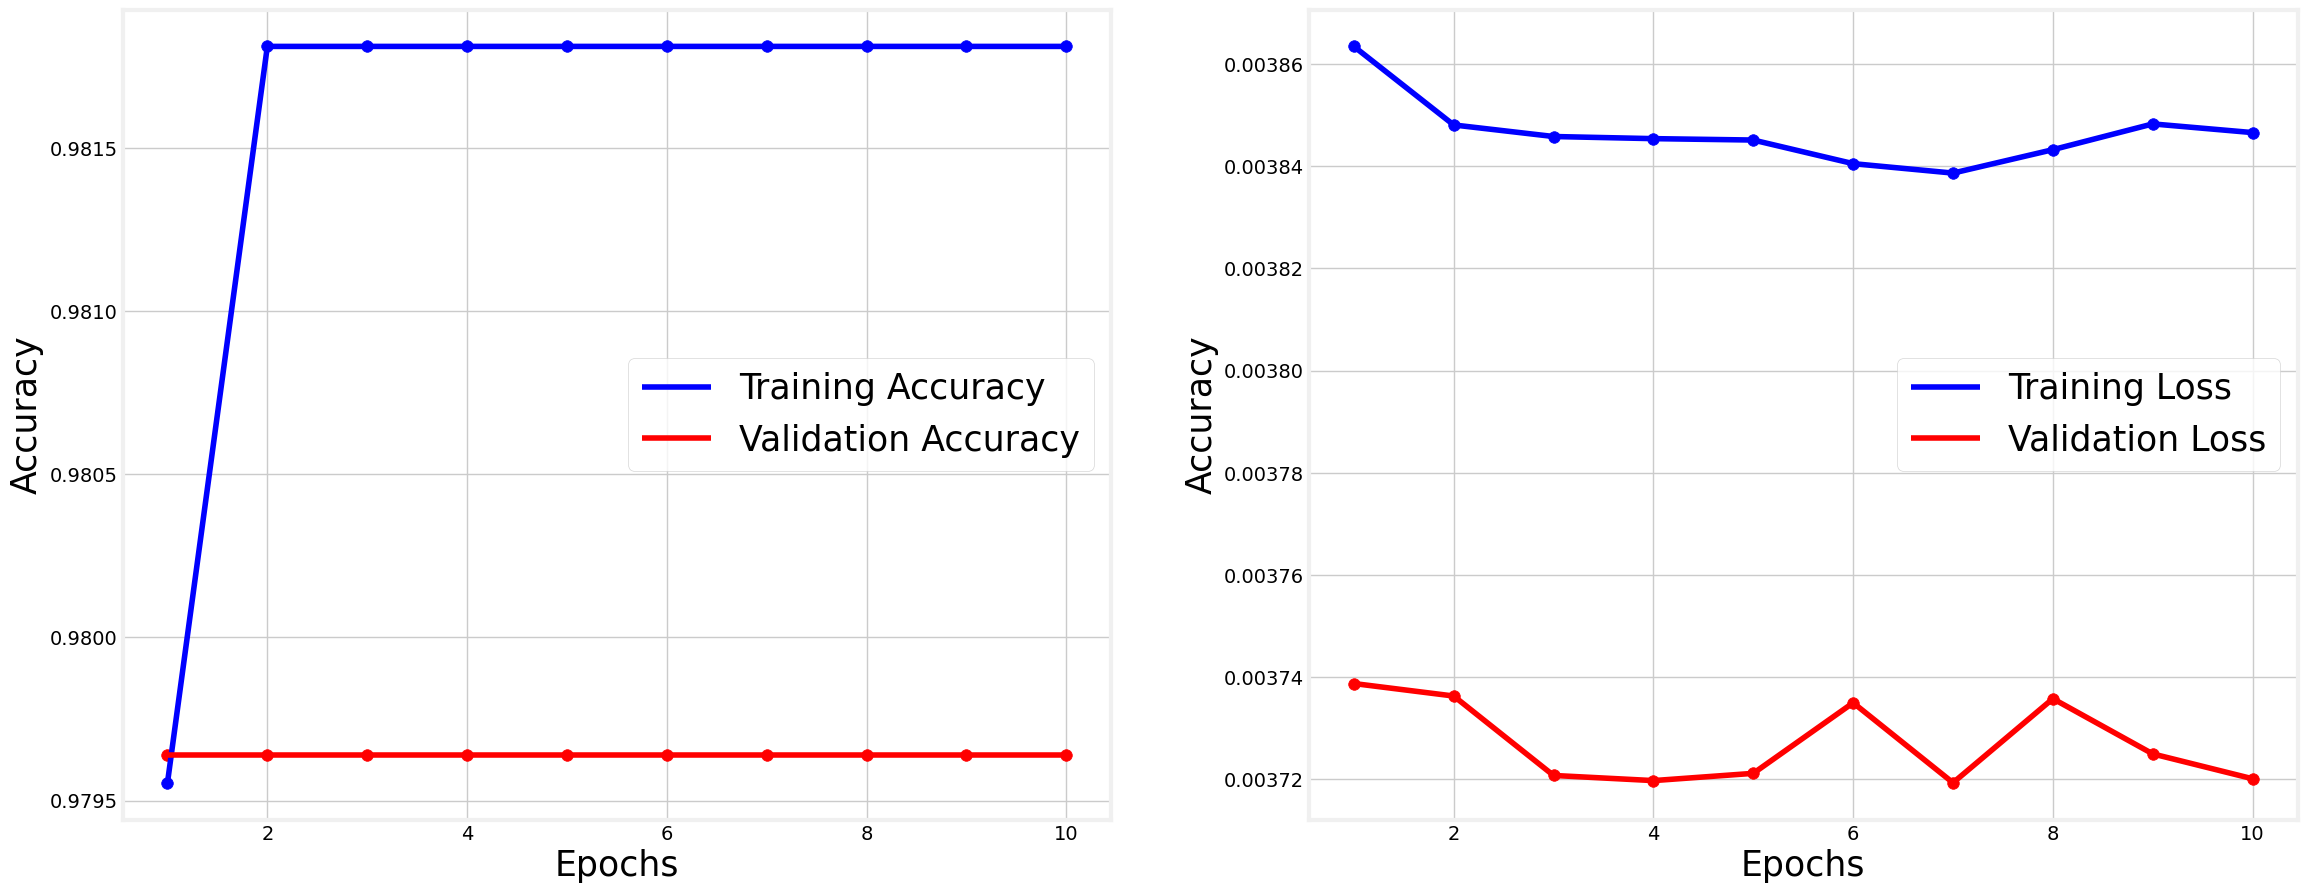

In [12]:
tr_plot(h2.history['accuracy'],h2.history['loss'],h2.history['val_accuracy'],h2.history['val_loss'],25,10)

SEKWENCJE DWUELEMENTOWE

In [13]:
N=2
sequence_length = N  # Set N to the desired number of previous timestamps to consider

# Convert DataFrame to numpy array
X1 = X.values
y1 = y.values

# Reshape X_train and y_train to create sequences
X_s = create_sequences(X1, sequence_length)
y_s = y1[sequence_length:]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=42)


In [15]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU

# Define LSTM model
model = Sequential([
    LSTM(10, input_shape=(2,3)),
    Dense(30,activation='relu'),
    Dense(10,activation='relu'),
    Dense(2,activation='softmax')
    ])

model.compile(optimizer='adam', loss='squared_hinge',metrics=['accuracy'])


In [16]:
h1=model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
512/512 [==============================] - 10s 11ms/step - loss: 0.0039 - accuracy: 0.8948 - val_loss: 0.0039 - val_accuracy: 0.9798
Epoch 2/10
512/512 [==============================] - 4s 8ms/step - loss: 0.0038 - accuracy: 0.9818 - val_loss: 0.0038 - val_accuracy: 0.9798
Epoch 3/10
512/512 [==============================] - 4s 8ms/step - loss: 0.0038 - accuracy: 0.9818 - val_loss: 0.0038 - val_accuracy: 0.9798
Epoch 4/10
512/512 [==============================] - 4s 7ms/step - loss: 0.0038 - accuracy: 0.9818 - val_loss: 0.0038 - val_accuracy: 0.9798
Epoch 5/10
512/512 [==============================] - 5s 9ms/step - loss: 0.0038 - accuracy: 0.9818 - val_loss: 0.0038 - val_accuracy: 0.9798
Epoch 6/10
512/512 [==============================] - 4s 9ms/step - loss: 0.0038 - accuracy: 0.9818 - val_loss: 0.0038 - val_accuracy: 0.9798
Epoch 7/10
512/512 [==============================] - 5s 9ms/step - loss: 0.0038 - accuracy: 0.9818 - val_loss: 0.0038 - val_accuracy: 0.9798
Epoc

In [17]:
model2 = Sequential([
    GRU(10, input_shape=(2,3)),
    Dense(30,activation='relu'),
    Dense(30,activation='relu'),
    Dense(10,activation='relu'),
    Dense(2,activation='softmax')
])
model2.compile(optimizer='adam', loss='squared_hinge',metrics=['accuracy'])
h2=model2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
512/512 [==============================] - 10s 11ms/step - loss: 0.0038 - accuracy: 0.9199 - val_loss: 0.0038 - val_accuracy: 0.9798
Epoch 2/10
512/512 [==============================] - 5s 10ms/step - loss: 0.0038 - accuracy: 0.9818 - val_loss: 0.0038 - val_accuracy: 0.9798
Epoch 3/10
512/512 [==============================] - 4s 9ms/step - loss: 0.0038 - accuracy: 0.9818 - val_loss: 0.0038 - val_accuracy: 0.9798
Epoch 4/10
512/512 [==============================] - 5s 10ms/step - loss: 0.0038 - accuracy: 0.9818 - val_loss: 0.0038 - val_accuracy: 0.9798
Epoch 5/10
512/512 [==============================] - 4s 7ms/step - loss: 0.0038 - accuracy: 0.9818 - val_loss: 0.0038 - val_accuracy: 0.9798
Epoch 6/10
512/512 [==============================] - 5s 9ms/step - loss: 0.0038 - accuracy: 0.9818 - val_loss: 0.0038 - val_accuracy: 0.9798
Epoch 7/10
512/512 [==============================] - 5s 10ms/step - loss: 0.0038 - accuracy: 0.9818 - val_loss: 0.0038 - val_accuracy: 0.9798
E

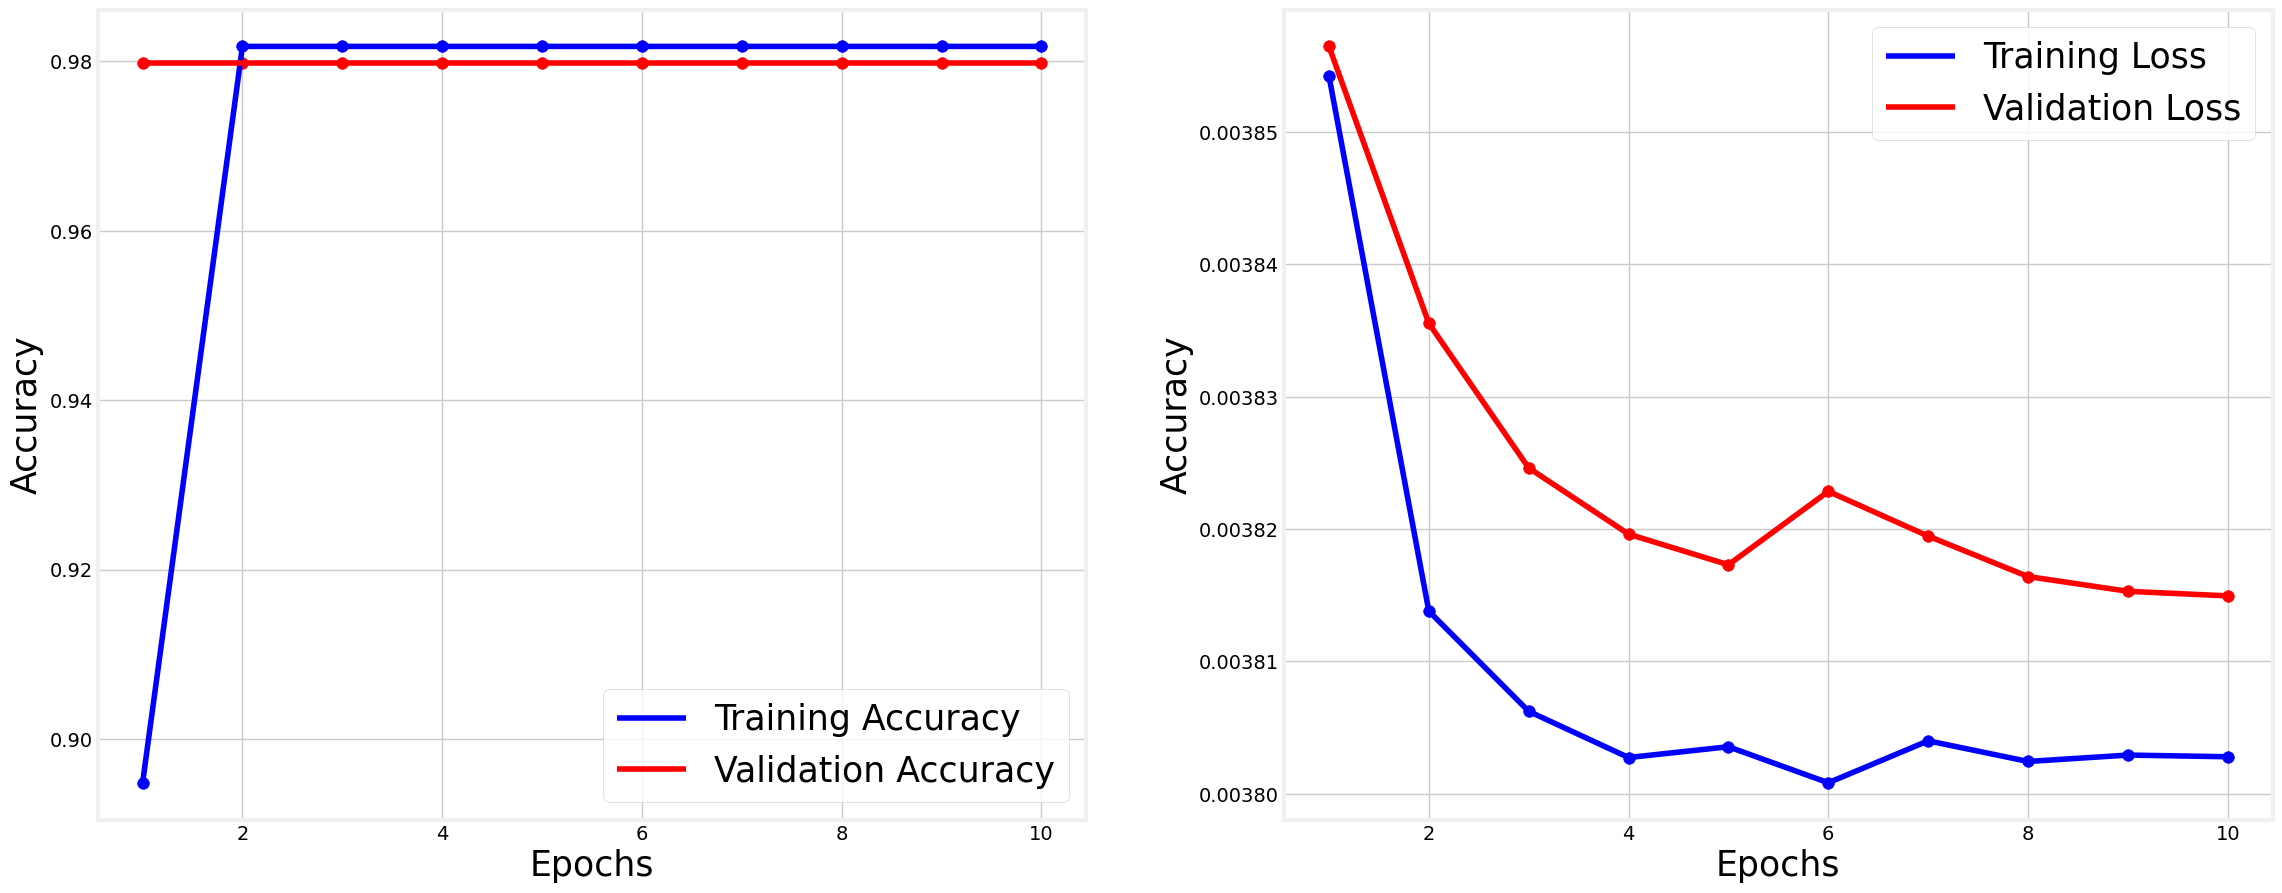

In [18]:
tr_plot(h1.history['accuracy'],h1.history['loss'],h1.history['val_accuracy'],h1.history['val_loss'],25,10)

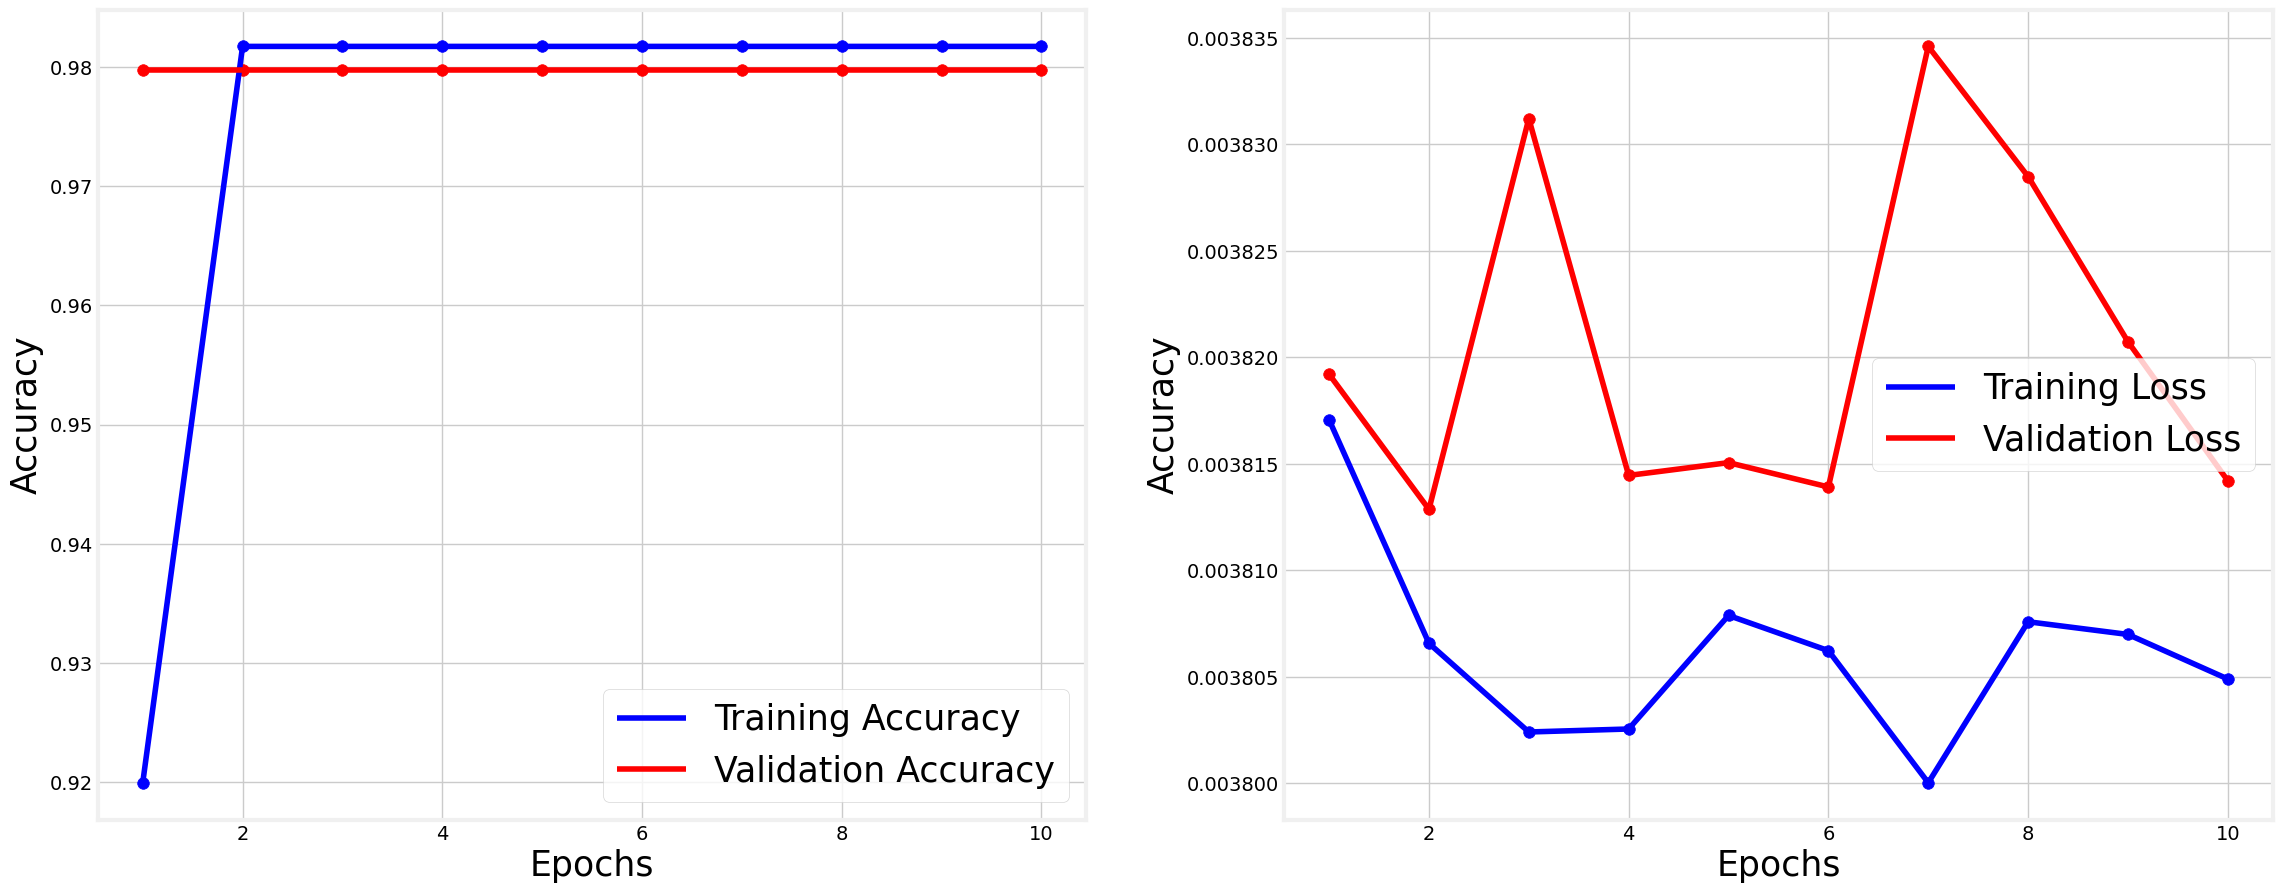

In [19]:
tr_plot(h2.history['accuracy'],h2.history['loss'],h2.history['val_accuracy'],h2.history['val_loss'],25,10)